In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
folder = 'C:\\Rakshya\\ULL\\First Semester\\Data Mining\\fairdomain-20241031T021302Z-001\\fairdomain'

In [3]:
data_summary = pd.read_csv(os.path.join(folder, 'data_summary.csv'))

In [4]:
data_summary

,filename,age,gender,race,ethnicity,language,maritalstatus,md,glaucoma,use
0,data_00001.npz,72.37,female,white,non-hispanic,english,widowed,-22.93,yes,training
1,data_00002.npz,62.09,female,white,non-hispanic,english,divorced,1.48,no,training
2,data_00003.npz,68.70,female,white,non-hispanic,english,married or partnered,-19.61,yes,training
3,data_00004.npz,57.07,female,white,non-hispanic,english,married or partnered,1.13,no,training
4,data_00005.npz,47.59,male,white,non-hispanic,english,single,0.44,no,training
...,...,...,...,...,...,...,...,...,...,...
4995,data_09996.npz,59.12,female,white,non-hispanic,english,married or partnered,0.16,no,testing
4996,data_09997.npz,62.00,female,white,non-hispanic,english,married or partnered,0.41,no,testing
4997,data_09998.npz,77.10,female,white,non-hispanic,english,widowed,-9.54,yes,testing
4998,data_09999.npz,44.76,female,white,non-hispanic,english,married or partnered,0.74,no,testing


In [5]:
data_summary['glaucoma'] = data_summary['glaucoma'].apply(lambda x: 1 if x == 'yes' else 0)

In [6]:
categorical_columns = ['gender', 'race', 'ethnicity', 'language', 'maritalstatus']
data_summary_encoded = pd.get_dummies(data_summary, columns=categorical_columns, drop_first=True)  #one hot-encoding

In [7]:

for k in data_summary_encoded.keys():
    print(k)

filename
age
md
glaucoma
use
gender_male
race_black
race_white
ethnicity_non-hispanic
language_other
language_spanish
language_unknown
maritalstatus_legally separated
maritalstatus_married or partnered
maritalstatus_single
maritalstatus_unknown
maritalstatus_widowed


In [8]:
# Split into training and testing sets based on 'use'
train_data = data_summary_encoded[data_summary_encoded['use'] == 'training'].drop(columns=['use'])
test_data = data_summary_encoded[data_summary_encoded['use'] == 'testing'].drop(columns=['use'])

In [9]:
train_data

,filename,age,md,glaucoma,gender_male,race_black,race_white,ethnicity_non-hispanic,language_other,language_spanish,language_unknown,maritalstatus_legally separated,maritalstatus_married or partnered,maritalstatus_single,maritalstatus_unknown,maritalstatus_widowed
0,data_00001.npz,72.37,-22.93,1,False,False,True,True,False,False,False,False,False,False,False,True
1,data_00002.npz,62.09,1.48,0,False,False,True,True,False,False,False,False,False,False,False,False
2,data_00003.npz,68.70,-19.61,1,False,False,True,True,False,False,False,False,True,False,False,False
3,data_00004.npz,57.07,1.13,0,False,False,True,True,False,False,False,False,True,False,False,False
4,data_00005.npz,47.59,0.44,0,True,False,True,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,data_02996.npz,62.00,-8.14,1,False,False,True,True,False,False,False,False,True,False,False,False
2996,data_02997.npz,60.26,-0.04,0,False,False,False,True,False,False,False,False,False,True,False,False
2997,data_02998.npz,63.84,-11.46,1,False,True,False,True,False,False,False,False,False,True,False,False
2998,data_02999.npz,56.87,0.26,0,True,False,False,True,False,False,False,False,True,False,False,False


In [10]:
test_data

,filename,age,md,glaucoma,gender_male,race_black,race_white,ethnicity_non-hispanic,language_other,language_spanish,language_unknown,maritalstatus_legally separated,maritalstatus_married or partnered,maritalstatus_single,maritalstatus_unknown,maritalstatus_widowed
3000,data_08001.npz,68.00,1.28,0,False,False,True,True,False,False,False,False,True,False,False,False
3001,data_08002.npz,50.07,-0.73,0,True,True,False,False,False,True,False,False,True,False,False,False
3002,data_08003.npz,77.57,0.11,0,False,False,False,True,True,False,False,False,True,False,False,False
3003,data_08004.npz,56.00,-0.14,0,False,False,True,True,False,False,False,False,True,False,False,False
3004,data_08005.npz,57.83,0.05,0,False,False,True,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,data_09996.npz,59.12,0.16,0,False,False,True,True,False,False,False,False,True,False,False,False
4996,data_09997.npz,62.00,0.41,0,False,False,True,True,False,False,False,False,True,False,False,False
4997,data_09998.npz,77.10,-9.54,1,False,False,True,True,False,False,False,False,False,False,False,True
4998,data_09999.npz,44.76,0.74,0,False,False,True,True,False,False,False,False,True,False,False,False


In [11]:
# Separate features (X) and labels (y)
X_train_metadata = train_data.drop(columns=['filename', 'glaucoma'])
y_train = train_data['glaucoma']
X_test_metadata = test_data.drop(columns=['filename', 'glaucoma'])
y_test = test_data['glaucoma']


Define function to load images from stored directory

In [12]:
def load_image_data(filenames, npz_dir):
    oct_fundus_images = []
    slo_fundus_images = []
    for fname in filenames:
        file_path = os.path.join(npz_dir, fname)
        with np.load(file_path) as data:
            oct_fundus_images.append(data['oct_fundus'])  # OCT fundus image
            slo_fundus_images.append(data['slo_fundus'])  # SLO fundus image
    return np.array(oct_fundus_images), np.array(slo_fundus_images)

In [13]:
train_data_dir = folder + '\\Training'
test_data_dir = folder + '\\Testing'

train_data_dir
test_data_dir

'C:\\Rakshya\\ULL\\First Semester\\Data Mining\\fairdomain-20241031T021302Z-001\\fairdomain\\Testing'

In [15]:
train_filenames = train_data['filename']
train_filenames

0       data_00001.npz
1       data_00002.npz
2       data_00003.npz
3       data_00004.npz
4       data_00005.npz
             ...      
2995    data_02996.npz
2996    data_02997.npz
2997    data_02998.npz
2998    data_02999.npz
2999    data_03000.npz
Name: filename, Length: 3000, dtype: object

In [16]:
test_filenames = test_data['filename']

test_filenames

3000    data_08001.npz
3001    data_08002.npz
3002    data_08003.npz
3003    data_08004.npz
3004    data_08005.npz
             ...      
4995    data_09996.npz
4996    data_09997.npz
4997    data_09998.npz
4998    data_09999.npz
4999    data_10000.npz
Name: filename, Length: 2000, dtype: object

In [17]:
X_train_oct, X_train_slo = load_image_data(train_filenames, train_data_dir)
X_test_oct, X_test_slo = load_image_data(test_filenames, test_data_dir)

In [18]:
type(X_train_oct)

numpy.ndarray

In [19]:
X_train_oct[0]

array([[197, 182, 177, ..., 170, 152, 147],
       [193, 191, 189, ..., 146, 135, 138],
       [184, 191, 197, ..., 150, 149, 141],
       ...,
       [189, 185, 188, ..., 192, 186, 187],
       [192, 186, 185, ..., 200, 191, 191],
       [169, 195, 191, ..., 198, 189, 187]], dtype=uint8)

In [22]:
print("Train shape OCT:", X_train_oct.shape)
print("Test shape OCT:", X_test_oct.shape)
print("Train shape SLO:", X_train_slo.shape)
print("Test shape SLO:", X_test_slo.shape)

Train shape OCT: (3000, 224, 224)
Test shape OCT: (2000, 224, 224)
Train shape SLO: (3000, 224, 224)
Test shape SLO: (2000, 224, 224)


In [23]:
#Addition of channels to training and testing data of  images
X_train_oct = np.expand_dims(X_train_oct, axis=-1)
X_test_oct = np.expand_dims(X_test_oct, axis=-1)
X_train_slo = np.expand_dims(X_train_slo, axis=-1)
X_test_slo = np.expand_dims(X_test_slo, axis=-1)

In [24]:
#after adding channels
print("Train shape OCT:", X_train_oct.shape)
print("Test shape OCT:", X_test_oct.shape)
print("Train shape SLO:", X_train_slo.shape)
print("Test shape SLO:", X_test_slo.shape)

Train shape OCT: (3000, 224, 224, 1)
Test shape OCT: (2000, 224, 224, 1)
Train shape SLO: (3000, 224, 224, 1)
Test shape SLO: (2000, 224, 224, 1)


Defining Multimodal model

In [25]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, concatenate
from tensorflow.keras.models import Model

In [26]:
#input branch
metadata_input = Input(shape=(X_train_metadata.shape[1],), name="metadata_input")
metadata_dense = Dense(64, activation='relu')(metadata_input)

In [27]:
# OCT image branch
oct_input = Input(shape=(224, 224, 1), name="oct_input")
oct_cnn = Conv2D(32, (3, 3), activation='relu')(oct_input)
oct_cnn = MaxPooling2D((2, 2))(oct_cnn)
oct_cnn = Flatten()(oct_cnn)

In [28]:
# SLO image branch
slo_input = Input(shape=(224, 224, 1), name="slo_input")
slo_cnn = Conv2D(32, (3, 3), activation='relu')(slo_input)
slo_cnn = MaxPooling2D((2, 2))(slo_cnn)
slo_cnn = Flatten()(slo_cnn)

In [29]:
# Combine all branches
combined = concatenate([metadata_dense, oct_cnn, slo_cnn])
x = Dense(128, activation='relu')(combined)
x = Dense(64, activation='relu')(x)

In [30]:
output = Dense(1, activation='sigmoid', name="output")(x)

Model Building

In [31]:
model = Model(inputs=[metadata_input, oct_input, slo_input], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ oct_input           │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ slo_input           │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 222, 222,  │        320 │ oct_input[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 222, 222,  │        320 │ slo_input[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ metadata_input      │ (None, 14)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 111, 111,  │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 111, 111,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │        960 │ metadata_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 394272)    │          0 │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 394272)    │          0 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 788608)    │          0 │ dense[0][0],      │
│ (Concatenate)       │                   │            │ flatten[0][0],    │
│                     │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │ 100,941,9… │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      8,256 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         65 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 100,951,873 (385.10 MB)

 Trainable params: 100,951,873 (385.10 MB)

 Non-trainable params: 0 (0.00 B)

Model Training

In [33]:
history = model.fit(
    [X_train_metadata, X_train_oct, X_train_slo],  # Inputs: metadata, OCT, SLO
    y_train,                                       # Labels
    validation_data=([X_test_metadata, X_test_oct, X_test_slo], y_test),
    epochs=50,
    batch_size=32
)

Epoch 1/50


c:\Users\Rakshya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['metadata_input', 'oct_input', 'slo_input']. Received: the structure of inputs=('*', '*', '*')
  warnings.warn(


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 838ms/step - accuracy: 0.5154 - loss: 490.0658

c:\Users\Rakshya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['metadata_input', 'oct_input', 'slo_input']. Received: the structure of inputs=('*', '*', '*')
  warnings.warn(


94/94 ━━━━━━━━━━━━━━━━━━━━ 88s 915ms/step - accuracy: 0.5156 - loss: 487.0144 - val_accuracy: 0.5660 - val_loss: 9.4405
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 84s 894ms/step - accuracy: 0.6734 - loss: 7.6474 - val_accuracy: 0.7090 - val_loss: 2.5541
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 86s 911ms/step - accuracy: 0.9087 - loss: 0.5247 - val_accuracy: 0.7690 - val_loss: 1.7979
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 87s 931ms/step - accuracy: 0.9811 - loss: 0.0574 - val_accuracy: 0.7795 - val_loss: 2.0704
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 89s 949ms/step - accuracy: 0.9976 - loss: 0.0072 - val_accuracy: 0.7875 - val_loss: 1.8165
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 85s 904ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.7955 - val_loss: 1.6007
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 89s 949ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.7930 - val_loss: 1.5596
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 89s 947ms/step - accuracy: 1.0000 - loss: 7.1805e-04 - val_accuracy:

Model Evaluation


In [34]:
test_loss, test_accuracy = model.evaluate([X_test_metadata, X_test_oct, X_test_slo], y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.7400 - loss: 2.1587
Test Loss: 2.105825185775757, Test Accuracy: 0.753000020980835


In [39]:
print("OCT Train Shape:", X_train_oct.shape)
print("SLO Train Shape:", X_train_slo.shape)
print("Metadata Train Shape:", X_train_metadata.shape)

print("OCT Test Shape:", X_test_oct.shape)
print("SLO Test Shape:", X_test_slo.shape)
print("Metadata Test Shape:", X_test_metadata.shape)

OCT Train Shape: (3000, 224, 224, 1)
SLO Train Shape: (3000, 224, 224, 1)
Metadata Train Shape: (3000, 14)
OCT Test Shape: (2000, 224, 224, 1)
SLO Test Shape: (2000, 224, 224, 1)
Metadata Test Shape: (2000, 14)


In [36]:
from sklearn.metrics import roc_auc_score


In [ ]:
y_pred_prob = model.predict([X_test_metadata,X_test_oct, X_test_slo])  #predicted probabilties for the test set

63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step


In [43]:
overall_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Overall AUC: {overall_auc}")

Overall AUC: 0.8110538465668116


In [44]:
X_test_metadata

,age,md,gender_male,race_black,race_white,ethnicity_non-hispanic,language_other,language_spanish,language_unknown,maritalstatus_legally separated,maritalstatus_married or partnered,maritalstatus_single,maritalstatus_unknown,maritalstatus_widowed
3000,68.00,1.28,False,False,True,True,False,False,False,False,True,False,False,False
3001,50.07,-0.73,True,True,False,False,False,True,False,False,True,False,False,False
3002,77.57,0.11,False,False,False,True,True,False,False,False,True,False,False,False
3003,56.00,-0.14,False,False,True,True,False,False,False,False,True,False,False,False
3004,57.83,0.05,False,False,True,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,59.12,0.16,False,False,True,True,False,False,False,False,True,False,False,False
4996,62.00,0.41,False,False,True,True,False,False,False,False,True,False,False,False
4997,77.10,-9.54,False,False,True,True,False,False,False,False,False,False,False,True
4998,44.76,0.74,False,False,True,True,False,False,False,False,True,False,False,False


In [45]:
y_test

3000    0
3001    0
3002    0
3003    0
3004    0
       ..
4995    0
4996    0
4997    1
4998    0
4999    1
Name: glaucoma, Length: 2000, dtype: int64

In [49]:

black_indices = X_test_metadata['race_black'] == True

black_indices

3000    False
3001     True
3002    False
3003    False
3004    False
        ...  
4995    False
4996    False
4997    False
4998    False
4999     True
Name: race_black, Length: 2000, dtype: bool

In [50]:
white_indices = X_test_metadata['race_white'] == True

In [51]:
asian_indices = ~(X_test_metadata['race_black'] | X_test_metadata['race_white'])

In [52]:
asian_auc = roc_auc_score(y_test[asian_indices], y_pred_prob[asian_indices])
black_auc = roc_auc_score(y_test[black_indices], y_pred_prob[black_indices])
white_auc = roc_auc_score(y_test[white_indices], y_pred_prob[white_indices])
print(f"Asian AUC: {asian_auc}")
print(f"Black AUC: {black_auc}")
print(f"White AUC: {white_auc}")

Asian AUC: 0.7962772785622594
Black AUC: 0.8030389908256881
White AUC: 0.809617258626352


Plotting AUC curve


In [53]:
import matplotlib.pyplot as plt

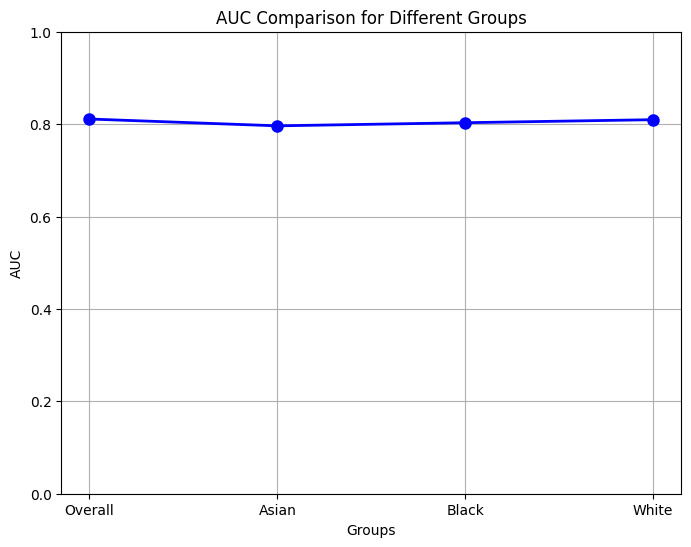

In [56]:
groups = ['Overall', 'Asian', 'Black', 'White']
auc_scores = [overall_auc, asian_auc, black_auc, white_auc]

plt.figure(figsize=(8, 6))
plt.plot(groups, auc_scores, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

plt.ylim(0, 1)  
plt.xlabel('Groups')
plt.ylabel('AUC')
plt.title('AUC Comparison for Different Groups')
plt.grid(True)
plt.show()